# Customer Churn pada E-Commerce
Oleh Kelompok 3

## Business Problem Understanding

### context
Customer churn pada E-Commerce adalah ketika customer akhirnya berhenti mengkonsumsi sesuatu dari sebuah e-commerce, untuk mengetahui customer churn atau tidak biasanya dilihat dari lamanya customer meninggalkan aplikasi e commerce selama periode waktu tertentu. Sebuah perusahaan ingin mengetahui apa penyebab dari customer churn yang terjasi dalam bisnisnya. Fokus utama sebuah e-commerce adalah mempertahankan pelanggan lama dan mengakusisi pelanggan baru.
Kenyamanan pelanggan menjadi point penting karena dapat menciptakan loyalitas pelanggan dan membuat pelanggan secara tidak langsung akan mempromosikan produk dari mulut ke mulut ketika mereka merasa puas terhadap suatu produk juga akan membuat customer meningkatkan permintaan pembelian produk, serta meningkatkan retensi customer dengan perusahaan.

Target :

0 : `No Churn`

1 : `Churn`

#### Problem Statement
Customer churn perlu dihentikan karena akan menyebabkan kerugian bagi perusahaan, juga mempertahankan pelanggan lama jauh lebih efektif dibanding mencari pelanggan baru karena biaya yang dikeluarkan lebih banyak. Maka dari itu perusahaan perlu mencari tahu karakteristik customer yang churn itu bagaimana sehingga customer yang masih bertahan dapat diberikan treatment khusus untuk terhindar dari customer churn.

### Goals
Maka berdasarkan permasalahan tersebut, setelah perusahaan mengetahui karakteristik customer yang churn itu bagaimana perusahaan dapat melakukan evaluasi untuk memperbaiki kekurangan yang menjadi penyebab customer meninggalkan bisnis perusahaan.

### Analytic Approach 
Jadi yang akan kita lakukan adalah menganalisis data untuk mencari tahu ciri-ciri customer yang churn, sehingga perusahaan dapat mengambil tindakan untuk meminimalisir customer churn.

In [2]:
pip install openpyxl


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

### Attribute Information
| Attribute | Data Type | Description |
| --- | --- | --- |
| CustomerID| int64 | Unique customer ID |
| Churn| int64 | Churn Flag |
| Tenure| float64 | Tenure of customer in organization |
| PreferredLoginDevice| object | Preferred login device of customer |
|CityTier | int64 | City tier |
| WarehouseToHome | float64 | Distance in between warehouse to home of customer |
| PreferredPaymentMode | object | Preferred payment method of customer |
| Gender | object | Gender of customer |
| HourSpendOnApp | float64 | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered  | int64 | Total number of deceives is registered on particular customer |
| PreferedOrderCat | object | Preferred order category of customer in last month |
| SatisfactionScore | int64 | Satisfactory score of customer on service |
| MaritalStatus | object | Marital status of customer |
| NumberOfAddress | int64 | Total number of added added on particular customer |
| Complain | int64 | Any complaint has been raised in last month |
| OrderAmountHikeFromlastYear| float64 | Percentage increases in order from last year |
| CouponUsed | float64 | Total number of coupon has been used in last month |
| OrderCount | float64 | Total number of orders has been places in last month|
| DaySinceLastOrder| float64 | Day Since last order by customer |
| CashbackAmount | float64 | Average cashback in last month |

In [228]:
#load data
df = pd.read_excel("E_Commerce_Dataset.xlsx")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Unnamed: 20,Unnamed: 21,curn,Unnamed: 23
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,1,11.0,1.0,1.0,5.0,159.93,NaN,NaN,NaN,NaN
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,1,15.0,0.0,1.0,0.0,120.90,NaN,NaN,no curn,4682.0
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,1,14.0,0.0,1.0,3.0,120.28,NaN,NaN,curn,949.0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,0,23.0,0.0,1.0,3.0,134.07,NaN,NaN,NaN,NaN
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,0,11.0,1.0,1.0,3.0,129.60,NaN,NaN,NaN,NaN


In [229]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Unnamed: 20,Unnamed: 21,curn,Unnamed: 23
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,0,18.0,1.0,2.0,4.0,150.71,NaN,NaN,NaN,NaN
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,0,16.0,1.0,2.0,NaN,224.91,NaN,NaN,NaN,NaN
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,1,21.0,1.0,2.0,4.0,186.42,NaN,NaN,NaN,NaN
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,0,15.0,2.0,2.0,9.0,178.90,NaN,NaN,NaN,NaN
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,...,0,13.0,2.0,2.0,3.0,169.04,NaN,NaN,NaN,NaN


# Data Understanding and Cleaning

In [230]:
#Function info digunakan untuk mengetahui tipe data pada setiap variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Kebanyakan variable berisi data numerik (float dan integer) dan beberapa berisi variable kategorikal (object)

In [231]:
df.duplicated().sum()

0

In [232]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Unnamed: 20,Unnamed: 21,Unnamed: 23
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,0.0,0.0,2.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030,NaN,NaN,2815.500000
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036,NaN,NaN,2639.629614
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,949.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,NaN,NaN,1882.250000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,NaN,NaN,2815.500000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,NaN,NaN,3748.750000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,NaN,NaN,4682.000000


Terdapat 5630 data customer yang ada di data set. Dan tidak ada data duplikat

In [233]:
# Pengecekan rata-rata missing value pada setiap variable
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

Unnamed: 21                    100.000000
Unnamed: 20                    100.000000
Unnamed: 23                     99.964476
curn                            99.964476
DaySinceLastOrder                5.452931
OrderAmountHikeFromlastYear      4.706927
Tenure                           4.689165
OrderCount                       4.582593
CouponUsed                       4.547069
HourSpendOnApp                   4.529307
WarehouseToHome                  4.458259
Complain                         0.000000
CashbackAmount                   0.000000
CustomerID                       0.000000
NumberOfAddress                  0.000000
Churn                            0.000000
SatisfactionScore                0.000000
PreferedOrderCat                 0.000000
NumberOfDeviceRegistered         0.000000
Gender                           0.000000
PreferredPaymentMode             0.000000
CityTier                         0.000000
PreferredLoginDevice             0.000000
MaritalStatus                    0

Terdapat 7 variable memiliki missing value dan semua value yang kosong berada dibawah 6%. Serta 4 variable memiliki value kosong diatas 10%.

<AxesSubplot: >

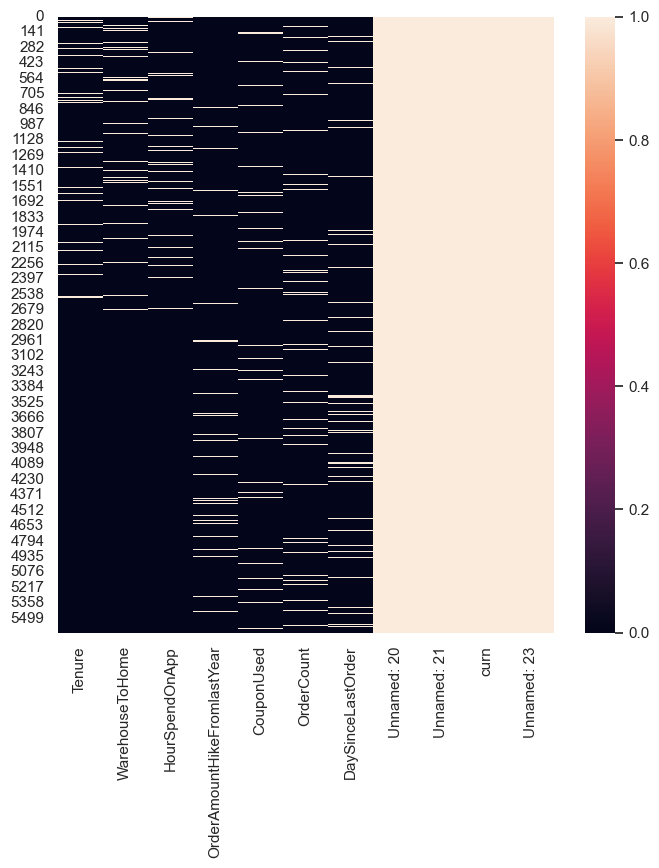

In [234]:
# Sebaran missing value di dalam data (subplot)
plt.figure(figsize=(8,8))
sns.heatmap(df[['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','Unnamed: 20','Unnamed: 21','curn','Unnamed: 23']].isna())

Terlihat dari subplot tersebut, bahwa kolom `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUSed`, dan `DaySinceLastOrder` memiliki missing values/data yang hilang.

Kemudian berdasarkan subplot tersebut juga, kolom `DaySinceLastOrder` adalah kolom yang memiliki data yang hilang terbanyak.

In [235]:
df.dropna(subset= ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder'], inplace=True)

In [236]:
df.drop(columns=['Unnamed: 20','Unnamed: 21','curn','Unnamed: 23','CustomerID'],inplace=True)

Variable yang missing value nya dibawah 10% dihapus barisnya yang kosong tersebut, dan variable yang missing  value nya diatas 10% maka dihapus kolomnya. Serta kolom `CustomerID` dihilangkan juga karena hanya berisi ID unik Customer.

In [237]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3774 non-null   int64  
 1   Tenure                       3774 non-null   float64
 2   PreferredLoginDevice         3774 non-null   object 
 3   CityTier                     3774 non-null   int64  
 4   WarehouseToHome              3774 non-null   float64
 5   PreferredPaymentMode         3774 non-null   object 
 6   Gender                       3774 non-null   object 
 7   HourSpendOnApp               3774 non-null   float64
 8   NumberOfDeviceRegistered     3774 non-null   int64  
 9   PreferedOrderCat             3774 non-null   object 
 10  SatisfactionScore            3774 non-null   int64  
 11  MaritalStatus                3774 non-null   object 
 12  NumberOfAddress              3774 non-null   int64  
 13  Complain          

Data yang tadinya ada 5630 sebelum dilakukan data cleaning, sekarang menjadi 3774 data customer pada dataset.

# Business Question

## 1. Berapa jumlah customer yang churn?

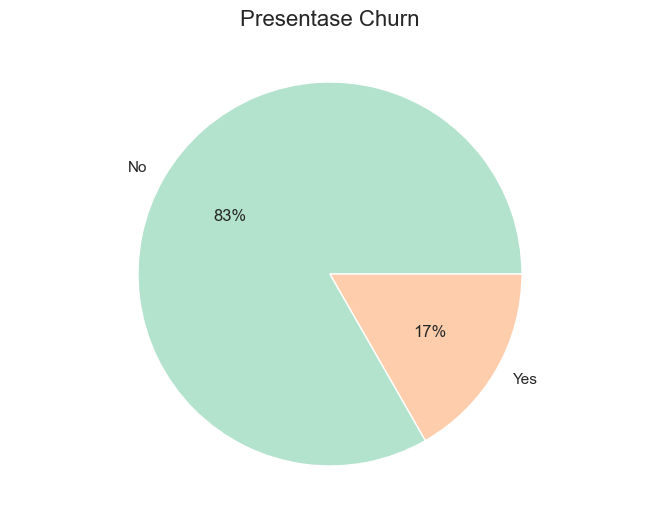

0    3143
1     631
Name: Churn, dtype: int64

In [239]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=16)
plt.show()
df['Churn'].value_counts()

### Insight : 
Berdasarkan grafik diatas presentase customer yg churn ada 83%, atau secara jumlah ada 631 customer yang churn dan 17% atau 3141 customer yang tetap bertahan, hal tersebut merupakan kasus data imbalance. Menurut kami presentase customer churn sudah cukup besar sehingga perlu diminimalisir karna akan menimbulkan kerugian bagi perusahaan.

## 2. Apa perangkat untuk login yang paling banyak digunakan oleh customer?

In [240]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    1936
Computer        1111
Phone            727
Name: PreferredLoginDevice, dtype: int64

Karena Mobile phone dan Phone itu merupakan perangkat login yang sama maka disatukan saja value nya.

In [241]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

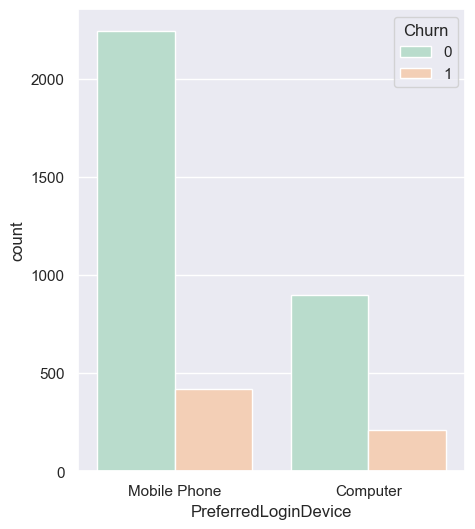

In [242]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = df, palette = 'Pastel2', hue = 'Churn' );

In [243]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2663
Computer        1111
Name: PreferredLoginDevice, dtype: int64

## Insight :
Mayoritas customer menggunakan Mobile phone untuk login ke ecommerce. Sehingga UX maupun UI harus ditingkatkan pada versi mobile nya demi kenyamanan customer saat menggunakan aplikasi.

## 3. Metode pembayaran apa yang paling banyak digunakan oleh customer?

In [247]:
df['PreferredPaymentMode'].value_counts()

Debit Card          1538
Credit Card         1159
E wallet             443
Cash on Delivery     349
UPI                  285
Name: PreferredPaymentMode, dtype: int64

Credit Card sama dengan CC, dan COD sama dengan Cash on Delivery maka di merge.

In [254]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [255]:
df1  =df['PreferredPaymentMode'].value_counts().reset_index()
df1.columns = ['mode', 'count']
df1

import plotly.express as px
fig = px.treemap(df1, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

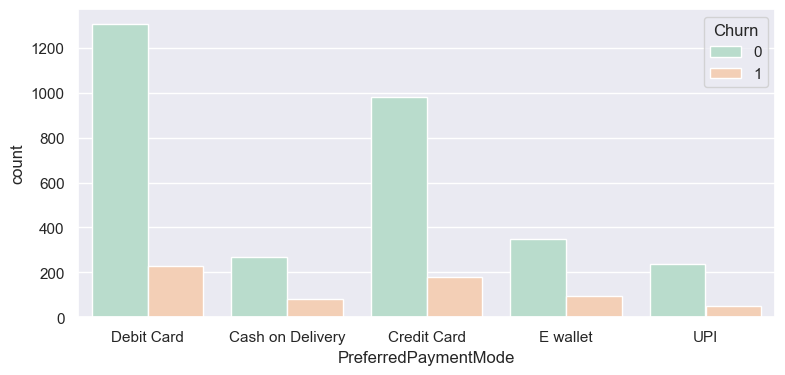

In [261]:
plt.figure(figsize = (9,4))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredPaymentMode',  data = df, palette = 'Pastel2', hue = 'Churn' );

In [257]:
df['PreferredPaymentMode'].value_counts()

Debit Card          1538
Credit Card         1159
E wallet             443
Cash on Delivery     349
UPI                  285
Name: PreferredPaymentMode, dtype: int64

## Insight :
Transaksi paling banyak dilakukan pembayaran nya adalah melalui debit card sedangkan UPI adalah yang paling sedikit. Dengan begitu perusahaan dapat memberikan penawaran khusus ketika customer memilih metode pembayarannya misalnya dengan menggunakan metode pembayaran melalui Debit Card maka ada cashback 5% dari harga transakasi.

## 4. Bagaimana hubungan antara jarak werehouse terhadap rumah customer pada city tier yang berbeda?

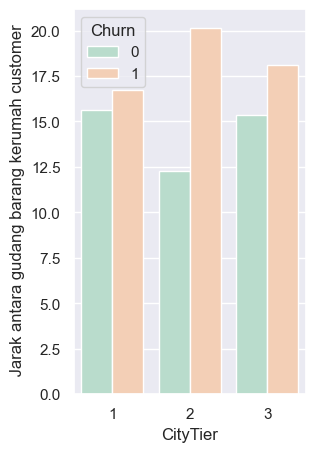

In [262]:
df2 = df.copy()

df2['CityTier'].astype('str')
plt.figure(figsize = (3,5))
sns.barplot(x = 'CityTier', y = 'WarehouseToHome', hue = 'Churn', data = df2, errorbar = None)
plt.ylabel(' Jarak antara gudang barang kerumah customer');

## Insight :
Pada setiap city tier 1, 2 dan 3 rata-rata memiliki jarak warehouse ke rumah customer diatas 10km, di tingkat kota 2 tingkat churn nya paling tinggi sehingga pada tingkat kota 2 harus menambah warehouse untuk memperpendek jarak antara gudang barang dengan rumah customer sehingga biaya ongkir akan lebih murah ketika jarak gudang semakin dekat dengan rumah customer, opsi lainnya perusahaan dapat memberikan gratis ongkir untuk pembelian dengan nominal harga tertentu, misalnya minimal transaksi sebesar Rp 80.000 diberi diskon ongkir per KM nya 2000 rupiah 

## 5. Apa kategori barang yang paling banyak di order oleh customer?

In [263]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64

In [264]:
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

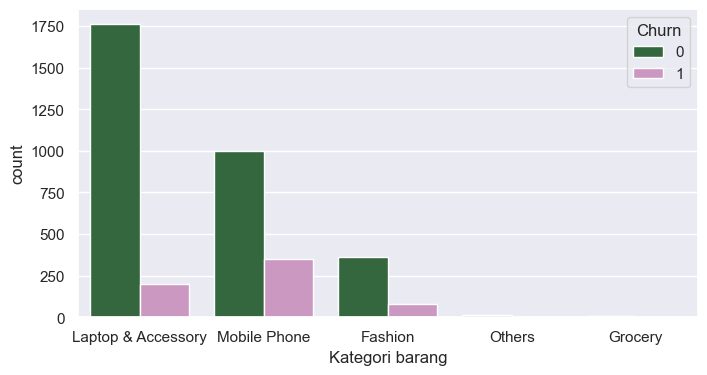

In [300]:
plt.figure(figsize = (8,4))
sns.countplot(x ='PreferedOrderCat', data = df, hue = 'Churn',
              palette = 'cubehelix',
              order = df['PreferedOrderCat'].value_counts().index) 
plt.xlabel('Kategori barang');

In [266]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1961
Mobile Phone          1346
Fashion                443
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64

## Insight:
Dari grafik tersebut, kategori barang yang paling banyak di order oleh customer adalah `Laptop & Accessory` dilanjutkan oleh `Mobile Phone` dan yang paling sedikit adalah kategori `Grocery`. 
Untuk meningkatkan penjualan pada kategori others maupun grocery perusahaan dapat memberikan diskon maupun cashback untuk jumlah pembelian maupun jumlah nominal harga tertentu.

## 6. Bagaimana hubungan antara gender dan marital status customer terhadap tingkat churn?

In [267]:
def stacked_plot(x):  
    sns.set(palette='Pastel2')

    tab = pd.crosstab(x,df['Churn'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,3))
    
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1))
    plt.ylabel('Proportion')
    plt.xticks(np.arange(len(tab.index.tolist())),tab.index.tolist(),rotation=0)
    plt.show()

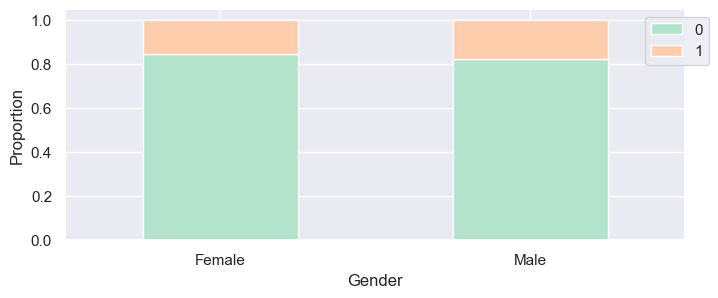

In [268]:
stacked_plot(df['Gender'])

In [269]:
df['Gender'].value_counts()

Male      2271
Female    1503
Name: Gender, dtype: int64

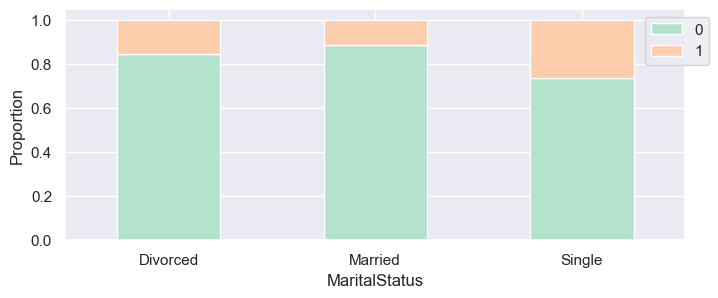

In [270]:
stacked_plot(df['MaritalStatus'])

In [271]:
df['MaritalStatus'].value_counts()

Married     1982
Single      1245
Divorced     547
Name: MaritalStatus, dtype: int64

## Insight :
Dari grafik diatas, proporsi antara gender female dan male sama rata dimana customer yang churn lebih sedikit dibanding yang tidak churn. Hal tersebut menunjukan bahwa gender tidak begitu memiliki pengaruh terhadap tingkat customer churn. 

Begitupun untuk proporsi Marital status antara yang divorced dengan married dan Single proporsi nya tidak jauh berbeda sehingga untuk variable `Gender` dan `MaritalStatus` tidak begitu berperan dalam mempengaruhi tingkat churn.

## Conclusion



- Terdapat 5630 data customer yang ada di data set sebelum dilakukan data cleaning. Dan tidak ada data duplikat
- Terdapat 7 variable memiliki missing value dan semua value yang kosong berada dibawah 6%. Serta muncul 4 variable baru yang memiliki value kosong diatas 10%.
- Variable yang missing value nya dibawah 10% dihapus barisnya yang kosong tersebut, dan variable yang missing value nya diatas 10% maka dihapus kolomnya. Serta kolom CustomerID dihilangkan juga karena hanya berisi ID unik Customer
- Pada setiap city tier 1, 2 dan 3 rata-rata memiliki jarak warehouse ke rumah customer diatas 10km
- Jumlah customer yang churn lebih sedikit dibandingkan 
- Mayoritas customer menggunakan Mobile phone untuk login ke ecommerce.
- Transaksi paling banyak dilakukan pembayaran nya adalah melalui debit card sedangkan UPI adalah yang paling sedikit.
- kategori barang yang paling banyak di order oleh customer adalah Laptop & Accessory dilanjutkan oleh Mobile Phone dan yang paling sedikit adalah kategori Grocery
- variable Gender dan MaritalStatus tidak begitu berperan dalam mempengaruhi tingkat churn

## Recommendation

- Untuk mempertahankan keunggulan penjualan pada kategori Laptop & Accessory dilanjutkan oleh Mobile Phone yang mana berkaitan dengan barang elektronik maka perusahaan bisa memberikan opsi kepada customer untuk menggunakan `Asurnasi Pengiriman` untuk menjamin kemanan paket yang dikenakan biaya tambahan.
-  Berkaitan dengan jarak warehouse dan rumah customer, Perusahaan dapat memberikan gratis ongkir untuk pembelian dengan nominal harga tertentu, misalnya minimal transaksi sebesar Rp 80.000 diberi diskon ongkir per KM nya 500 rupiah.
- Karena mayoritas customer login menggunakan mobile phone untuk menggunakan aplikasi maka perusahaan dapat meningkatkan tampilan UX maupun UI harus ditingkatkan pada versi mobile nya demi kenyamanan customer saat menggunakan aplikasi.
- perusahaan dapat memberikan penawaran khusus ketika customer memilih metode pembayarannya misalnya dengan menggunakan metode pembayaran melalui Debit Card maka ada cashback 5% dari nominal transakasi.